In [28]:

%store -r df_resineux
%store -r df_feuillus



In [29]:
import pandas as pd
from utils import get_biomass_summary

summary_feuillus = get_biomass_summary(df_feuillus)['biomass']
summary_resineux = get_biomass_summary(df_resineux)['biomass']

biomass_comparison = pd.DataFrame(
    {
        "feuillus": summary_feuillus,
        "resineux": summary_resineux,
    }
)

biomass_comparison


,feuillus,resineux
mean,262.034481,175.431344
median,171.666387,179.499689
sum,6288.827549,6490.959727
count,24.000000,37.000000


This section rescales the total resineux biomass to the same number of individuals as in the feuillus plot (using the ratio `count_feuillus / count_resineux`). This gives a normalized resineux total biomass and an updated comparison table, plus a bar plot of the comparable sums.

In [30]:
# Compute scaling factor based on individual counts
count_feuillus = summary_feuillus["count"]
count_resineux = summary_resineux["count"]

scaling_factor_resineux = count_feuillus / count_resineux

normalized_sum_resineux = summary_resineux["sum"] * scaling_factor_resineux

normalized_sums = pd.Series(
    {
        "feuillus": summary_feuillus["sum"],
        "resineux": normalized_sum_resineux,
    },
    name="normalized_sum",
)

biomass_comparison_normalized = biomass_comparison.copy()
biomass_comparison_normalized.loc["sum", "resineux"] = normalized_sum_resineux

normalized_sums

feuillus    6288.827549
resineux    4210.352255
Name: normalized_sum, dtype: float64

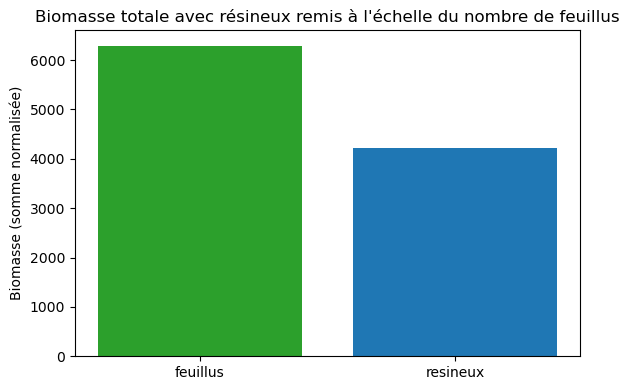

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(normalized_sums.index, normalized_sums.values, color=["tab:green", "tab:blue"])
plt.ylabel("Biomasse (somme normalisée)")
plt.title("Biomasse totale avec résineux remis à l'échelle du nombre de feuillus")
plt.tight_layout()
plt.show()


This section creates an overlapping normal distribution chart of biomass for feuillus and résineux trees, using both histograms and fitted normal curves based on `df_feuillus` and `df_resineux`.

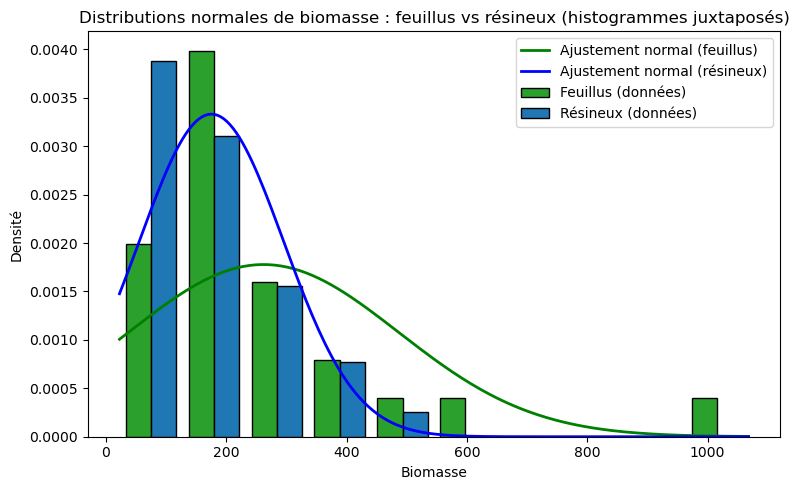

In [32]:
import numpy as np
from scipy.stats import norm

biomass_feuillus_values = df_feuillus["biomass"]
biomass_resineux_values = df_resineux["biomass"]

x_min = min(biomass_feuillus_values.min(), biomass_resineux_values.min())
x_max = max(biomass_feuillus_values.max(), biomass_resineux_values.max())
x = np.linspace(x_min, x_max, 200)

# Compute common bin edges for both datasets
all_values = np.concatenate([biomass_feuillus_values.values, biomass_resineux_values.values])
bins = np.histogram_bin_edges(all_values, bins=10)

# Compute histogram densities
feuillus_hist, _ = np.histogram(biomass_feuillus_values, bins=bins, density=True)
resineux_hist, _ = np.histogram(biomass_resineux_values, bins=bins, density=True)

# Compute bar positions (side by side)
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_width = (bins[1] - bins[0]) * 0.4  # each bar narrower than bin, placed side by side

plt.figure(figsize=(8, 5))
plt.bar(
    bin_centers - bin_width / 2,
    feuillus_hist,
    width=bin_width,
    color="tab:green",
    edgecolor="black",
    label="Feuillus (données)",
)
plt.bar(
    bin_centers + bin_width / 2,
    resineux_hist,
    width=bin_width,
    color="tab:blue",
    edgecolor="black",
    label="Résineux (données)",
)

feuillus_mean = biomass_feuillus_values.mean()
feuillus_std = biomass_feuillus_values.std()
resineux_mean = biomass_resineux_values.mean()
resineux_std = biomass_resineux_values.std()

plt.plot(
    x,
    norm.pdf(x, feuillus_mean, feuillus_std),
    color="green",
    linewidth=2,
    label="Ajustement normal (feuillus)",
)
plt.plot(
    x,
    norm.pdf(x, resineux_mean, resineux_std),
    color="blue",
    linewidth=2,
    label="Ajustement normal (résineux)",
)

plt.xlabel("Biomasse")
plt.ylabel("Densité")
plt.title("Distributions normales de biomasse : feuillus vs résineux (histogrammes juxtaposés)")
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
from utils import get_biomass_summary_by_species

df_all = pd.concat([df_resineux, df_feuillus])

get_biomass_summary_by_species(df_all)

,mean,median,sum,count
species,,,,
bouleau_blanc,158.020709,136.868171,3160.414181,20
épinette_noire,201.644486,198.274055,5646.045600,28
érable_rouge,305.640577,191.575919,3973.327495,13
